In [1]:
%matplotlib inline
import pdb
import sys
import pandas as pd
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib
import scipy.signal as sg
import math
import scipy as sp
import socket
import os

matplotlib.style.use('ggplot')

comp_name=socket.gethostname()
if  comp_name == 'Ezequiels-MacBook-Pro.local':
    print 'Computer: ' + comp_name
    sys.path.append('/Users/zeke/experiment/ephysDataManagement/ephysScripts')
    experiment_folder = os.path.join('/Users','zeke','experiment')
else:
    print 'Computer: ' + 'server'
    sys.path.append('/experiment/ephysDataManagement/ephysScripts')
    experiment_folder = os.path.join('/','experiment')
    
import unitToolsv2
from data_handling import ephys_names as en
from data_handling.basic_plot import decim, plot_raster
from data_handling import data_load as dl

Computer: server


In [2]:
mouse = 'ZKawakeM72'
sess  = 13
rec   = 'e'
fn = en.file_names(mouse,sess,rec,root=experiment_folder)

In [3]:
mat_file = os.path.join(fn.fold_exp_data,'ZKawakeM72_013_010_cell.mat')
r=dl.load_cell(mat_file, as_dict=True)
print r.keys()

['ZKawakeM72_013_f_010', 'ZKawakeM72_013_e_010']


In [24]:
#Load a baseline sniff file
mat_file = os.path.join(fn.fold_exp_data,'ZKawakeM72_013_e_trialsBase.mat')

sniffs= dl.load_sniff_base(mat_file, as_dict=False)
#plot all the baseline sniffs
snif_plot = plt.figure()
all_ax = snif_plot.add_axes([0, 0, 1, .4])
avg_ax = snif_plot.add_axes([0, .5, 1, .4])

t=np.arange(0, 450, 1)
avg_line = avg_ax.plot(np.average(-sniffs['flow'][250:750,:],axis=1))
lines=all_ax.plot(-sniffs['flow'][250:750,:50])

AttributeError: 'mat_struct' object has no attribute 'sniffPhase'

In [29]:
os.path.split(mat_file)[-1].split('.')[0].split('_')[-1]

'trialsBase'

In [19]:
#load the spikes baseline raster file
'ZKawakeM72_010_001_cell.mat'
mat_file = os.path.join(fn.fold_exp_data,'ZKawakeM72_010_001_spikesBase.mat')

bases = dl.load_baseline(mat_file)
print bases.keys()
spikes = [bases[a_key] for a_key in bases.keys()]

#spikes = load_baseline(mat_file, as_dict = False)
#print spikes
#print spikes[0]['u_id']
#print spikes[0]['id']

sr_spikes = spikes[0]['spikes']
sr_t0 = spikes[0]['t_0']

#plot all the baseline sniffs
sr_plot = plt.figure()
ras_ax  = sr_plot.add_axes([0, 0, 1, .4])
hist_ax = sr_plot.add_axes([0, .5, 1, .4])
t0 = 500
t1 = 0
t2= 2500
bin_size=10

#plot the raster
lines,_ = plot_raster(sr_spikes,t0=t0,t1=t1,t2=t2,ax=ras_ax)
ras_ax.set_xlim(-500,2500)

#the psth
hist_line, hist_ax = plot_raster(sr_spikes,t0=t0, t1=t1,t2=t2, bin_size=15, ax=hist_ax)
#hist_ax.set_ylim(0.9,1.1)
hist_ax.set_xlim(-500,2500)

AssertionError: 

In [4]:
# get all the cells
cells_path = fn.fold_exp_data
records = dl.load_cells(cells_path)

['ZKawakeM72_013_f_010', 'ZKawakeM72_013_e_010']
['/experiment/export_data/ZKawakeM72_013_f_trial.mat', '/experiment/export_data/ZKawakeM72_013_e_trial.mat']
/experiment/export_data/ZKawakeM72_013_f_trial.mat
/experiment/export_data/ZKawakeM72_013_e_trial.mat
['/experiment/export_data/ZKawakeM72_013_f_noStimSniff.mat', '/experiment/export_data/ZKawakeM72_013_e_noStimSniff.mat']
/experiment/export_data/ZKawakeM72_013_f_noStimSniff.mat


ValueError: dictionary update sequence element #0 has length 4; 2 is required

In [5]:
records['responses'].keys()

['KPawakeM72_016_a_023',
 'ZKawakeM72_009_a_005',
 'KPawakeM72_016_a_021',
 'KPawakeM72_016_a_020',
 'ZKawakeM72_009_a_001',
 'KPawakeM72_016_a_025',
 'ZKawakeM72_009_a_002',
 'KPawakeM72_021_b_023',
 'KPawakeM72_021_b_026',
 'KPawakeM72_021_b_028',
 'KPawakeM72_021_b_029',
 'ZKawakeM72_010_f_004',
 'ZKawakeM72_009_a_003',
 'KPawakeM72_019_a_001',
 'ZKawakeM72_022_e_003',
 'ZKawakeM72_020_f_013',
 'KPawakeM72_016_a_018',
 'KPawakeM72_016_a_019',
 'KPawakeM72_016_a_016',
 'KPawakeM72_016_a_017',
 'ZKawakeM72_004_e_010',
 'KPawakeM72_016_a_012',
 'KPawakeM72_016_a_010',
 'KPawakeM72_016_a_011',
 'ZKawakeM72_012_a_012',
 'ZKawakeM72_012_a_013',
 'ZKawakeM72_012_a_010',
 'ZKawakeM72_012_a_011',
 'ZKawakeM72_027_d_004',
 'ZKawakeM72_004_g_015',
 'ZKawakeM72_004_d_007',
 'ZKawakeM72_004_d_006',
 'ZKawakeM72_004_d_008',
 'KPawakeM72_021_a_013',
 'ZKawakeM72_004_i_001',
 'KPawakeM72_016_a_009',
 'KPawakeM72_016_a_008',
 'KPawakeM72_019_b_021',
 'KPawakeM72_019_b_020',
 'ZKawakeM72_020_g_019',


In [14]:
print records[5]['meta']['id']
print records[5]['rec_id']
#baselines.keys()
print len(records)
#records[4][0].keys()
baselines[records[5]['meta']['id']].keys()

unit_recs = records[5:8]
print base_sniff.keys()
print 'rec'
#rec_trials.keys()
print rec_trials[records[5]['rec_id']].keys()
print base_sniff[records[5]['rec_id']].keys()

NameError: name 'records' is not defined

In [39]:
u_f = unit_files[-4]
#print u_f
rec_file = os.path.join(fn.fold_exp_data,u_f)
#records = load_cell(rec_file)
#print sio.whosmat(mat_file)
#print records

cell_data = sio.loadmat(rec_file, struct_as_record=False, squeeze_me=True)

records = []
print type(cell_data['raster'])
#print len(cell_data['raster'])
#num_recs = len(cell_data['raster']) #num of recs the cell spans

if type(cell_data['raster']) == np.ndarray:
    for rec in  cell_data['raster']:
        #print rec
        record = get_rec(rec)
        records.append(record)
else:
    records.append(get_rec(cell_data['raster']))
    
#records = load_cell(rec_file)

#print one_cell['uid']
#cell_data['raster'][0][1]['odors'].shape
records[1]['rec_id']

<type 'numpy.ndarray'>


'ZKawakeM72_010_c'

In [183]:
# Load a unit array
# todo: complete
mat_file = os.path.join(fn.fold_exp_data,'ZKawakeM72_027_e_spikes.mat')
cell_data = sio.loadmat(mat_file, struct_as_record=False, squeeze_me=True)
print sio.whosmat(mat_file)
unit = cell_data['unit']
unit.times
u=np.array(unit.times,dtype=np.float)
unit = load_unit(mat_file)
unit.keys()
unit['ZKawakeM72_027_e_004']['times']


[('unit', (1, 1), 'struct')]


In [6]:
## plot the psth of an odor, by odorName and concentration
def conc_compare(conc1, conc2, tolerance=1.5):
    return 1./float(tolerance) < float(conc1)/float(conc2) and float(conc1)/float(conc2) < float(tolerance)

odor_name = ['2-hydroxyacetophenone','2hydroxyacetophenone']
odor_conc = 0.0051
cell_id = 'ZKawakeM72_020_c_001'
#get the rec
a_record = records['responses'][cell_id]
print a_record['rec_id']
print a_record['odor_resp'].keys()
#get the indexes of the trials with this odor
this_odor_conc = [i for i in range(len(a_record['odor_resp']['odors'])) if a_record['odor_resp']['odors'][i].lower() in odor_name \
             and conc_compare(a_record['odor_resp']['concs'][i], odor_conc)
            ]
#plot the psth
#


ZKawakeM72_020_c
['trialId', 't_0', 'concs', 'odors', 'spikes']


In [14]:
print a_record['odor_resp'].keys()

['trialId', 't_0', 'concs', 'odors', 'spikes']


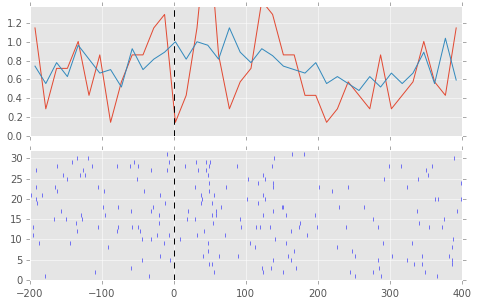

In [13]:
# plot a raster for a record, odor, concentration

sr_spikes = a_record['odor_resp']['spikes'][this_odor_conc,:]
sr_t0     = a_record['odor_resp']['t_0']

#plot the psth
sr_plot = plt.figure()
ras_ax  = sr_plot.add_axes([0, 0, 1, .45])
hist_ax = sr_plot.add_axes([0, .5, 1, .45])
t0 = 200
t1 = 2800
t2= 3400
bin_size=15

#plot the raster
lines,_ = plot_raster(sr_spikes,t0=t0,t1=t1,t2=t2,ax=ras_ax)
ras_ax.set_xlim(-t0,t2-t1-t0)

#the psth
hist_line, hist_ax = plot_raster(sr_spikes,t0=t0, t1=t1,t2=t2, bin_size=bin_size, ax=hist_ax)
#hist_ax.set_ylim(0.9,1.1)
hist_ax.set_xlim(-t0,t2-t1-t0)
hist_ax.set_xticklabels([])

#the baseline
#get the baseline for the cell
bl_spikes = records['baselines'][a_record['meta']['id']]['spikes']
bl_t0     = records['baselines'][a_record['meta']['id']]['t_0']
t1=300
t0=200
t2=900
base_line, hist_ax = plot_raster(bl_spikes,t0=t0, t1=t1,t2=t2, bin_size=bin_size, ax=hist_ax)

In [91]:
def cells_for_odor(responses, odor_aliases, odor_conc = ''):
    #finds all the cells that respond to an odor, and set of concentrations
    #returns sub set of responses
    odor_responses = {};
    for key, response in responses.iteritems():
        is_right_odor = any([x in response['odor_resp']['odors'] for x in aliases])
        if is_right_odor:
            if odor_conc == '':
                is_right_conc = True
            else:
                is_right_conc = any([conc_compare(x, y) for x in response['odor_resp']['concs'] for y in odor_conc])
            if is_right_conc:
                odor_responses.update(responses[key])
    return odor_responses


In [59]:
a_record['odor_resp']['concs'][3]

0.0012144000502303243

In [62]:
aliases = ['menthone', 'mentone']
odor_conc = [0.0051]
conc = [a_record['odor_resp']['concs'][0], a_record['odor_resp']['concs'][0]]

any([x in records['responses']['ZKawakeM72_027_d_003']['odor_resp']['o'] for x in aliases])

True

In [55]:
is_right_conc = False
for conc in odor_conc:
    is_right_conc = is_right_conc & any([conc_compare(x, conc) for x in a_record['odor_resp']['concs']])

In [61]:
any([conc_compare(x, y) for x in a_record['odor_resp']['concs'] for y in odor_conc])

True

In [97]:
ment_cells = cells_for_odor(records['responses'],aliases)

In [92]:
sel_resp = {};
for response in records['responses']:
    print records['responses'][response].keys()
    sel_resp.update(records['responses'][response])


['meta', 'rec_id', 'odor_resp', 'light_resp']
['meta', 'rec_id', 'odor_resp', 'light_resp']
['meta', 'rec_id', 'odor_resp', 'light_resp']
['meta', 'rec_id', 'odor_resp', 'light_resp']
['meta', 'rec_id', 'odor_resp', 'light_resp']
['meta', 'rec_id', 'odor_resp', 'light_resp']
['meta', 'rec_id', 'odor_resp', 'light_resp']
['meta', 'rec_id', 'odor_resp', 'light_resp']
['meta', 'rec_id', 'odor_resp', 'light_resp']
['meta', 'rec_id', 'odor_resp', 'light_resp']
['meta', 'rec_id', 'odor_resp', 'light_resp']
['meta', 'rec_id', 'odor_resp', 'light_resp']
['meta', 'rec_id', 'odor_resp', 'light_resp']
['meta', 'rec_id', 'odor_resp', 'light_resp']
['meta', 'rec_id', 'odor_resp', 'light_resp']
['meta', 'rec_id', 'odor_resp', 'light_resp']
['meta', 'rec_id', 'odor_resp', 'light_resp']
['meta', 'rec_id', 'odor_resp', 'light_resp']
['meta', 'rec_id', 'odor_resp', 'light_resp']
['meta', 'rec_id', 'odor_resp', 'light_resp']
['meta', 'rec_id', 'odor_resp', 'light_resp']
['meta', 'rec_id', 'odor_resp', 'l

In [101]:
one_fieldment_cells[1]

TypeError: 'NoneType' object has no attribute '__getitem__'

In [41]:
mat_file = os.path.join(fn.fold_exp_data,'ZKawakeM72_013_010_noStimSniff.mat')
cell_data = sio.loadmat(mat_file, struct_as_record=False, squeeze_me=True)
print sio.whosmat(mat_file)
print cell_data['noStimSniffs'][1]
one_sniff = cell_data['noStimSniffs'][1]

[('noStimSniffs', (1, 2336), 'struct')]


In [120]:
cell_data['noStimSniffs'].shape[0]

2336

In [71]:
x=np.array((np.array([]), 'Hello'), (np.array([]), 'World'))

TypeError: data type not understood

In [75]:
x = np.zeros((2,), dtype=('np.ndarray,a10'))

TypeError: data type "np.ndarray" not understood

In [60]:
x[1][1]

3.0

In [73]:
y=np.array([])
type(y)

numpy.ndarray

In [76]:
np.ndarray

numpy.ndarray

In [136]:
x=np.ones(3, dtype=np.dtype([('foo', int), ('bar', np.ndarray(dtype=np.float))]))
y=np.ones(3, dtype=np.dtype([('foo', int), ('bar', np.ndarray(dtype=np.float))]))

TypeError: Required argument 'shape' (pos 1) not found

In [98]:
x[1]['bar']=np.ndarray([1,2])

In [99]:
z=np.concatenate((x,y))

In [102]:
z[3]['bar']

1

In [105]:
z['foo']

array([1, 1, 1, 1, 1, 1])

In [135]:
y=np.ndarray((3,), dtype=np.dtype([('foo', int), ('bar', np.ndarray)]))

In [107]:
y

array((0, None), 
      dtype=[('foo', '<i8'), ('bar', 'O')])

In [116]:
y[0]=(3,[1,2,5])

array([(3, [1, 2, 5]), (0, None), (0, None)], 
      dtype=[('foo', '<i8'), ('bar', 'O')])

In [134]:
y=np.nan([2,3])

TypeError: 'float' object is not callable

In [140]:
np.zeros((3,),dtype=np.float)

array([ 0.,  0.,  0.])